<a href="https://colab.research.google.com/github/vestinabert/Image_Quality_Assessment/blob/main/Image_Quality_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


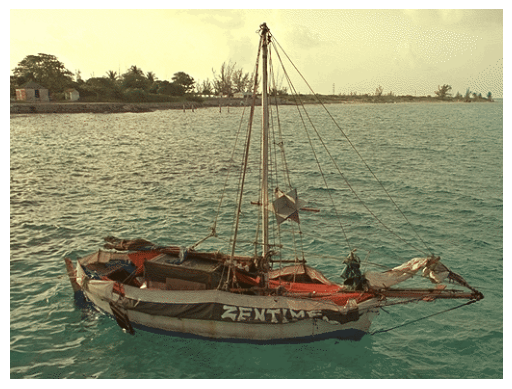

In [13]:
import cv2
import os
import matplotlib.pyplot as plt

# Define the path to images
img_dir = "/content/drive/My Drive/images_dataset/distorted_images"
img_files = os.listdir(img_dir)

# Read and display an image
img_path = os.path.join(img_dir, img_files[0])
img = cv2.imread(img_path)  # Read image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

plt.imshow(img)
plt.axis('off')
plt.show()


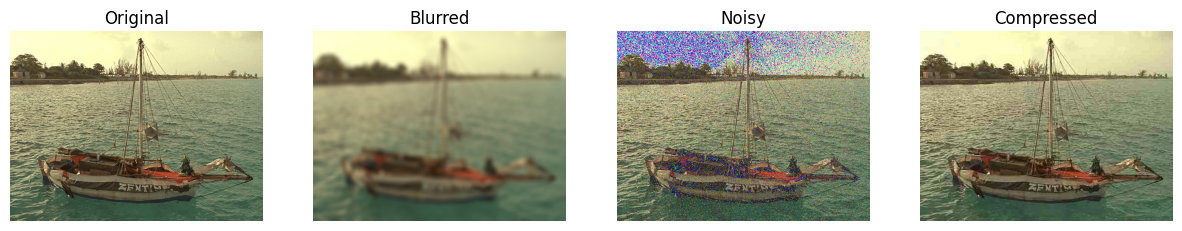

In [14]:
import numpy as np

# Load an image
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Apply distortions
blurred = cv2.GaussianBlur(img, (15, 15), 5)  # Gaussian Blur
noise = img + np.random.normal(0, 25, img.shape).astype(np.uint8)  # Add Noise
_, compressed = cv2.imencode('.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 20])  # JPEG Compression
compressed = cv2.imdecode(compressed, cv2.IMREAD_COLOR)

# Display results
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
axs[0].imshow(img)
axs[0].set_title("Original")
axs[1].imshow(blurred)
axs[1].set_title("Blurred")
axs[2].imshow(noise)
axs[2].set_title("Noisy")
axs[3].imshow(compressed)
axs[3].set_title("Compressed")

for ax in axs:
    ax.axis("off")

plt.show()


Suliejimas (Blur) atsiranda dėl netinkamo fokusavimo, judėjimo arba vaizdo suspaudimo. Tai sukelia smulkių detalių praradimą, sumažina vaizdo aiškumą ir apsunkina objektų atpažinimą. Tokie iškraipymai dažniausiai pasitaiko nefokusuotose nuotraukose, stebėjimo kamerų vaizduose arba suspaustuose paveikslėliuose.

Triukšmas (Noise) kyla dėl mažo apšvietimo, didelio ISO jautrumo ar signalo trikdžių. Jis sukelia „grūdėtą“ efektą, sumažina spalvų ir kontrasto tikslumą bei apsunkina smulkių detalių matomumą. Triukšmas dažniausiai pasitaiko naktinėse nuotraukose, vaizdo stebėjimo sistemose ir žemos kokybės kamerose.

JPEG artefaktai atsiranda dėl per stipraus suspaudimo arba daugybinių nuotraukos įrašų naudojant JPEG formatą. Tai sukelia blokelių efektą, iškraipytus kraštus ir spalvų netikslumus. Tokie artefaktai dažniausiai pastebimi socialiniuose tinkluose, mažos raiškos vaizdo įrašuose ir stipriai optimizuotuose internetiniuose paveikslėliuose.

In [19]:
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

# Konvertuojame vaizdus į pilkus atspalvius
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
blurred_gray = cv2.cvtColor(blurred, cv2.COLOR_RGB2GRAY)
noise_gray = cv2.cvtColor(noise, cv2.COLOR_RGB2GRAY)
compressed_gray = cv2.cvtColor(compressed, cv2.COLOR_RGB2GRAY)

# Skaičiuojame PSNR ir SSIM
def evaluate_quality(reference, distorted):
    psnr_value = psnr(reference, distorted)
    ssim_value, _ = ssim(reference, distorted, full=True)
    return psnr_value, ssim_value

print("Blurred:", evaluate_quality(img_gray, blurred_gray))
print("Noisy:", evaluate_quality(img_gray, noise_gray))
print("Compressed:", evaluate_quality(img_gray, compressed_gray))


Blurred: (21.008017091818516, 0.34868470782723254)
Noisy: (14.651239293037637, 0.5305394805371088)
Compressed: (26.68801982220303, 0.7895125142467296)


**PSNR (Piko signalo ir triukšmo santykis)** ir **SSIM (Struktūrinio panašumo indeksas)** yra dvi pagrindinės vaizdo kokybės vertinimo metrikos, kurios leidžia įvertinti, kaip iškraipytas vaizdas skiriasi nuo originalo. **PSNR** matuoja skirtumus tarp pikselių intensyvumo reikšmių – kuo didesnė reikšmė, tuo mažiau iškraipymų ir geresnė kokybė. Rezultatuose sulietas vaizdas turi **PSNR = 21,01 dB**, kas reiškia vidutinį detalumo praradimą. Triukšmingas vaizdas turi **mažiausią PSNR (14,65 dB)**, rodantį stiprius iškraipymus. Suspaustas JPEG vaizdas pasiekia **aukščiausią PSNR (26,69 dB)**, kas reiškia, kad, nors suspaudimas įvedė artefaktus, jis vis tiek išsaugo daugiau informacijos nei kiti iškraipymai.

**SSIM** vertina vaizdo struktūros, šviesumo ir kontrasto išsaugojimą, kur reikšmė **1 reiškia identiškus vaizdus**, o **mažesnės reikšmės rodo didesnius kokybės praradimus**. Sulietas vaizdas turi **SSIM = 0,35**, kas rodo, kad jis prarado daug struktūrinių detalių. Triukšmingas vaizdas turi **SSIM = 0,53**, nes triukšmas nepraranda visos vaizdo struktūros, tačiau įterpia atsitiktinius iškraipymus. Suspaustas JPEG vaizdas turi **SSIM = 0,79**, kas reiškia, kad jis išlaiko daugiausiai struktūrinės informacijos. Šie rezultatai rodo, kad **suliejimas yra blogiausias detalumo praradimo požiūriu**, triukšmas sukelia didelius, bet lokalizuotus pokyčius, o JPEG suspaudimas, nors ir įvedantis artefaktus, išlaiko bendrą vaizdo struktūrą geriau nei kiti iškraipymai.